<a href="https://colab.research.google.com/github/Vaniotosta/PROJETO-DE-ESTUDO-DEEP-LEARNING-DETECCAO-DE-PNEUMONIA/blob/main/Detec%C3%A7%C3%A3o_de_Pneumonia_7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#PROJETO DE ESTUDO USANDO DEEP LEARNING-DETECÇÃO DE PNEUMONIA

#Introdução ao Problema de Negócio de Detecção de Pneumonia
A pneumonia é uma infecção respiratória aguda que afeta os pulmões, sendo uma das principais causas de morbidade e mortalidade em todo o mundo. Segundo a Organização Mundial da Saúde (OMS).

A detecção precoce da pneumonia é crucial para garantir um tratamento eficaz e reduzir o risco de complicações. No entanto, o diagnóstico clínico da pneumonia pode ser desafiador devido à sua semelhança com outras doenças respiratórias e à variabilidade nos sintomas apresentados pelos pacientes. Tradicionalmente, o diagnóstico é feito com base em sintomas clínicos, exames físicos e radiografias de tórax. No entanto, a interpretação das radiografias pode ser subjetiva e dependente da experiência do radiologista, levando a diagnósticos inconsistentes.

Importância da Detecção Automatizada de Pneumonia
Com os avanços em inteligência artificial (IA) e aprendizado de máquina, há uma oportunidade significativa para melhorar a precisão e a rapidez do diagnóstico de pneumonia. A utilização de algoritmos de aprendizado profundo (deep learning) para a análise de imagens de radiografias de tórax pode proporcionar uma ferramenta poderosa para os profissionais de saúde. Esses algoritmos têm o potencial de:

Aumentar a Precisão Diagnóstica: Reduzir a variabilidade e subjetividade na interpretação de radiografias, proporcionando uma segunda opinião consistente e baseada em dados.
Melhorar a Eficiência Clínica: Acelerar o processo de diagnóstico, permitindo que os médicos tomem decisões mais rápidas e iniciem o tratamento mais cedo.
Acessibilidade: Levar diagnósticos precisos para regiões com escassez de radiologistas experientes, melhorando o acesso ao cuidado de saúde de qualidade em áreas remotas e subatendidas.

# Justificativa

Por isso se justifica esse, quanto ao conjunto de dados "Chest X-Ray Images (Pneumonia)", você pode encontrá-lo no Kaggle através do seguinte link: https://www.kaggle.com/paultimothymooney/chest-xray-pneumonia

A URL acima levará você diretamente ao conjunto de dados. O nome do conjunto de dados é "Chest X-Ray Images (Pneumonia)" e foi criado por Paul Mooney.

In [1]:
# criar diretórios (pastas) no servidor
!mkdir -p /root/.kaggle/

# Mover a API "kaggle.json" para a pasta "kaggle"
!mv kaggle.json /root/.kaggle/

mv: cannot stat 'kaggle.json': No such file or directory


In [2]:
# Fazendo Download da fonte de Dados
!kaggle datasets download -d paultimothymooney/chest-xray-pneumonia

Dataset URL: https://www.kaggle.com/datasets/paultimothymooney/chest-xray-pneumonia
License(s): other
 99% 2.27G/2.29G [00:10<00:00, 227MB/s]
100% 2.29G/2.29G [00:10<00:00, 224MB/s]


In [3]:
import zipfile

# Caminho para o arquivo zip
zip_file_path = '/content/chest-xray-pneumonia.zip'

# Caminho para o diretório onde deseja extrair as imagens
extracted_dir_path = '/content/chest-xray-pneumonia/'

# Descompactar o arquivo zip
with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    zip_ref.extractall(extracted_dir_path)

In [4]:
# Definindo os diretórios de treinamento e teste
train_dir = '/content/chest-xray-pneumonia/chest_xray/train'
test_dir = '/content/chest-xray-pneumonia/chest_xray/test'

## Import Das Bibliotecas para Criar o modelo de Deep Learning

In [5]:
### Import Das Bibliotecas para Criar o modelo de Deep Learning
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.applications import VGG16
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np
import numpy as pd
import matplotlib.pyplot as plt
import random
from tensorflow.keras.layers import BatchNormalization

###  Processamento de Dados
Ao aplicar essas transformações, ImageDataGenerator cria versões aumentadas das imagens do conjunto de treinamento a cada época de treinamento, aumentando a diversidade dos dados e ajudando o modelo a aprender melhor e a generalizar para novos dados.

In [6]:
#definir sementes
#tf.random.set_seed(42)
#np.random.seed(42)
#random.seed(42)

In [7]:
###  Processamento de Dados


###############################################################################################################################

# O RESCALE NORMALMENTE NORMALIZA ESCALA ENTRE (0 e 1), normalmente vem (0,255)
# rotation, rotaciona em -20 e 20 graus a imagem , ajuda em pequenas qtd de imagens
# width_shift_range translada aleatoriamente as imagens horizontalmente (para a esquerda ou direita) por até 20% da largura da imagem.
#height_shift_range translada verticalmente esuqerda e direita por até 20% larg
# shear_range é o cisalhamento é uma transformação que distorce a imagem ao mover uma parte dela em uma direção diferente, como se a imagem estivesse sendo "empurrada" ou "puxada".

# zoom_range aplica zoom de até 20%
#horizontal_flip , Inverte aleatoriamente as imagens horizontalmente.
# fill_mode define o modo como a imagem é rotacionada ou translada,o ''nearest' usa o valor do pixel mais próximo para preencher esses espaços.
#########################################################################################################################################


# Carregamento de imagens de treinamento e teste

Temos 5216 imagens para treinamento e 624 para teste

In [8]:
# Aumento de dados para o conjunto de treinamento
train_datagen = ImageDataGenerator(
    rescale=1.0 / 255.0,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

# Carregamento de imagens de treinamento e teste
batch_size = 32

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(150, 150),
    batch_size=batch_size,
    class_mode='binary'
)

test_datagen = ImageDataGenerator(rescale=1.0 / 255.0)

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(150, 150),
    batch_size=batch_size,
    class_mode='binary'
)

Found 5216 images belonging to 2 classes.
Found 624 images belonging to 2 classes.


# Criação da Máquina Preditiva de Detecção de Pneumonia

- weights='imagenet': Carrega os pesos pré-treinados no conjunto de dados ImageNet.

- include_top=False: Exclui as camadas densas finais (classificação) do VGG16. Isso é útil para usar a arquitetura como um extrator de características.

- input_shape=(150, 150, 3): Define a forma da entrada, com imagens de 150x150 pixels e 3 canais de cor (RGB).


In [9]:
# Carregamento do modelo VGG16 pré-treinado
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(150, 150, 3))

# Construção do modelo personalizado
model = Sequential()
model.add(base_model)
model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))

# Congelar camadas convolucionais do modelo base (VGG16)
base_model.trainable = False

# Compilação do modelo
model.compile(optimizer=Adam(lr=0.0001), loss='binary_crossentropy', metrics=['accuracy'])




# Treinamento do modelo
history = model.fit(
    train_generator,
    steps_per_epoch=len(train_generator),
    epochs=20,
    validation_data=test_generator,
    validation_steps=len(test_generator)
)



58889256/58889256 [==============================] - 0s 0us/step


Epoch 1/20
163/163 [==============================] - 89s 537ms/step - loss: 0.2937 - accuracy: 0.8792 - val_loss: 0.3209 - val_accuracy: 0.8750
Epoch 2/20
163/163 [==============================] - 87s 534ms/step - loss: 0.2183 - accuracy: 0.9141 - val_loss: 0.3078 - val_accuracy: 0.8766
Epoch 3/20
163/163 [==============================] - 88s 536ms/step - loss: 0.1875 - accuracy: 0.9289 - val_loss: 0.3076 - val_accuracy: 0.8846
Epoch 4/20
163/163 [==============================] - 87s 533ms/step - loss: 0.1790 - accuracy: 0.9271 - val_loss: 0.2813 - val_accuracy: 0.9038
Epoch 5/20
163/163 [==============================] - 86s 528ms/step - loss: 0.1849 - accuracy: 0.9287 - val_loss: 0.3181 - val_accuracy: 0.8846
Epoch 6/20
163/163 [==============================] - 86s 528ms/step - loss: 0.1714 - accuracy: 0.9346 - val_loss: 0.2543 - val_accuracy: 0.8990
Epoch 7/20
163/163 [==============================] - 86s 528ms/step - loss: 0.1670 - accuracy: 0.9333 - val_loss: 0.2430 - val_ac

### AVALIANDO O MODELO

20/20 [==============================] - 6s 307ms/step - loss: 0.2579 - accuracy: 0.8990
Acurácia no conjunto de teste: 89.90%
20/20 [==============================] - 7s 316ms/step
Matriz de Confusão:
[[ 77 157]
 [116 274]]
Relatório de Classificação:
              precision    recall  f1-score   support

      Normal       0.40      0.33      0.36       234
   Pneumonia       0.64      0.70      0.67       390

    accuracy                           0.56       624
   macro avg       0.52      0.52      0.51       624
weighted avg       0.55      0.56      0.55       624



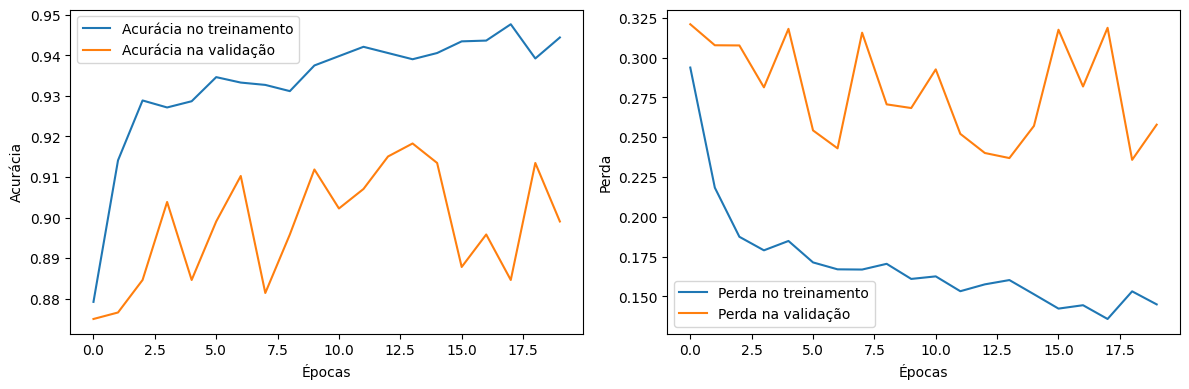

In [10]:
# Avaliação do modelo
test_loss, test_acc = model.evaluate(test_generator, steps=len(test_generator))
print(f'Acurácia no conjunto de teste: {test_acc * 100:.2f}%')

# Exibição da matriz de confusão e relatório de classificação
test_labels = test_generator.classes
predictions = model.predict(test_generator, steps=len(test_generator))
predicted_labels = (predictions > 0.5).astype(int)

conf_matrix = confusion_matrix(test_labels, predicted_labels)
print("Matriz de Confusão:")
print(conf_matrix)

class_report = classification_report(test_labels, predicted_labels, target_names=['Normal', 'Pneumonia'])
print("Relatório de Classificação:")
print(class_report)

# Plotagem da curva de aprendizado
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Acurácia no treinamento')
plt.plot(history.history['val_accuracy'], label='Acurácia na validação')
plt.xlabel('Épocas')
plt.ylabel('Acurácia')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Perda no treinamento')
plt.plot(history.history['val_loss'], label='Perda na validação')
plt.xlabel('Épocas')
plt.ylabel('Perda')
plt.legend()

plt.tight_layout()
plt.show()

In [11]:
# Monitoramento de desempenho
history_dict = history.history

best_train_acc = max(history_dict['accuracy'])
best_train_acc_epoch = history_dict['accuracy'].index(best_train_acc) + 1
best_train_loss = min(history_dict['loss'])
best_train_loss_epoch = history_dict['loss'].index(best_train_loss) + 1

best_val_acc = max(history_dict['val_accuracy'])
best_val_acc_epoch = history_dict['val_accuracy'].index(best_val_acc) + 1
best_val_loss = min(history_dict['val_loss'])
best_val_loss_epoch = history_dict['val_loss'].index(best_val_loss) + 1
print(f" - Melhor Acurácia de Treinamento: {best_train_acc} na Época: {best_train_acc_epoch}")
print(f" - Menor Perda de Treinamento: {best_train_loss} na Época: {best_train_loss_epoch}")
print(f" - Melhor Acurácia de Validação: {best_val_acc} na Época: {best_val_acc_epoch}")
print(f" - Menor Perda de Validação: {best_val_loss} na Época: {best_val_loss_epoch}")

 - Melhor Acurácia de Treinamento: 0.9476610422134399 na Época: 18
 - Menor Perda de Treinamento: 0.1358705759048462 na Época: 18
 - Melhor Acurácia de Validação: 0.9182692170143127 na Época: 14
 - Menor Perda de Validação: 0.2357933521270752 na Época: 19


##Principais Insights no modelo 1

Desempenho Geral:

Acurácia Geral: O modelo possui uma acurácia de 56%, o que indica que o modelo acerta ligeiramente mais da metade das previsões.
Desempenho por Classe:

Classe Normal:

- Precisão: 0.40
- Recall: 0.33
- F1-Score: 0.36

**Análise:**

Das 234 imagens normais, o modelo acertou 77 e errou 157, indicando que ele ainda está errando uma quantidade significativa de casos normais.

A precisão de 0.40 indica que 40% das previsões de "Normal" são corretas.
O recall de 0.33 mostra que o modelo identifica corretamente 33% das imagens que são realmente normais.

O modelo tem dificuldade em identificar corretamente as imagens normais, resultando em uma precisão e recall moderadamente baixos para esta classe.

Classe Pneumonia:

- Precisão: 0.64
- Recall: 0.70
- F1-Score: 0.67

**Análise:**

Dos 390 casos de pneumonia, o modelo acertou 274 e errou 116.

A precisão de 0.64 indica que 64% das previsões de "Pneumonia" são corretas.

O recall de 0.70 mostra que o modelo identifica corretamente 70% das imagens que são realmente pneumonia.

O modelo é mais eficaz em identificar corretamente as imagens de pneumonia em comparação à classe normal, mas ainda existem falsos negativos (116).

Conclusões e Recomendações:

***Classe Normal: O modelo apresenta dificuldades em identificar imagens normais, embora a precisão e o recall tenham melhorado ligeiramente em comparação com o modelo anterior. É necessário continuar aprimorando o modelo para reduzir o número de falsos positivos e falsos negativos.***

Classe Pneumonia: O modelo tem um desempenho relativamente melhor na identificação de pneumonia, com uma precisão e recall mais altos. No entanto, ainda há espaço para melhorias, especialmente na redução dos falsos negativos.




### Tendo como estratégia que a melhor acurácia na validação está na época 3 , decidi reduzir o número de épocas para 5, e usar novo parâmetros!

##ESTRATÉGIA PARA TENTAR MELHORAR O MODELO
- Reduzi pela metado os números de épocas com base nos gráficos de validação.
- Aumentei as camadas densas e usei o Batachnormalization
- Usei dua dropout na  camadas densas

In [19]:
# Carregamento do modelo VGG16 pré-treinado
base_model_2 = VGG16(weights='imagenet', include_top=False, input_shape=(150, 150, 3))

# Construção do modelo personalizado
model = Sequential()
model.add(base_model_2)
model.add(Flatten())
model.add(Dense(1024, activation='relu'))
model.add(BatchNormalization())
model.add(Dense(512, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))


# Congelar camadas convolucionais do modelo base (VGG16)
base_model_2.trainable = False

# Compilação do modelo
model.compile(optimizer=Adam(learning_rate=0.01 ), loss='binary_crossentropy', metrics=['accuracy'])




# Treinamento do modelo
history = model.fit(
    train_generator,
    steps_per_epoch=len(train_generator),
    epochs=5,
    validation_data=test_generator,
    validation_steps=len(test_generator)
)

Epoch 1/5
163/163 [==============================] - 89s 538ms/step - loss: 0.3718 - accuracy: 0.8715 - val_loss: 2.5726 - val_accuracy: 0.6506
Epoch 2/5
163/163 [==============================] - 87s 535ms/step - loss: 0.2262 - accuracy: 0.9145 - val_loss: 0.3115 - val_accuracy: 0.8862
Epoch 3/5
163/163 [==============================] - 88s 540ms/step - loss: 0.2032 - accuracy: 0.9247 - val_loss: 1.2392 - val_accuracy: 0.5994
Epoch 4/5
163/163 [==============================] - 88s 537ms/step - loss: 0.1875 - accuracy: 0.9300 - val_loss: 0.2333 - val_accuracy: 0.9151
Epoch 5/5
163/163 [==============================] - 87s 534ms/step - loss: 0.1814 - accuracy: 0.9277 - val_loss: 0.7356 - val_accuracy: 0.7580


## AVALIANDO MODELO 2

In [20]:
# Avaliação do modelo
test_loss, test_acc = model.evaluate(test_generator, steps=len(test_generator))
print(f'Acurácia no conjunto de teste: {test_acc * 100:.2f}%')

20/20 [==============================] - 6s 310ms/step - loss: 0.7356 - accuracy: 0.7580
Acurácia no conjunto de teste: 75.80%


20/20 [==============================] - 7s 317ms/step
Matriz de Confusão:
[[ 31 203]
 [ 54 336]]
Relatório de Classificação:
              precision    recall  f1-score   support

      Normal       0.36      0.13      0.19       234
   Pneumonia       0.62      0.86      0.72       390

    accuracy                           0.59       624
   macro avg       0.49      0.50      0.46       624
weighted avg       0.53      0.59      0.52       624



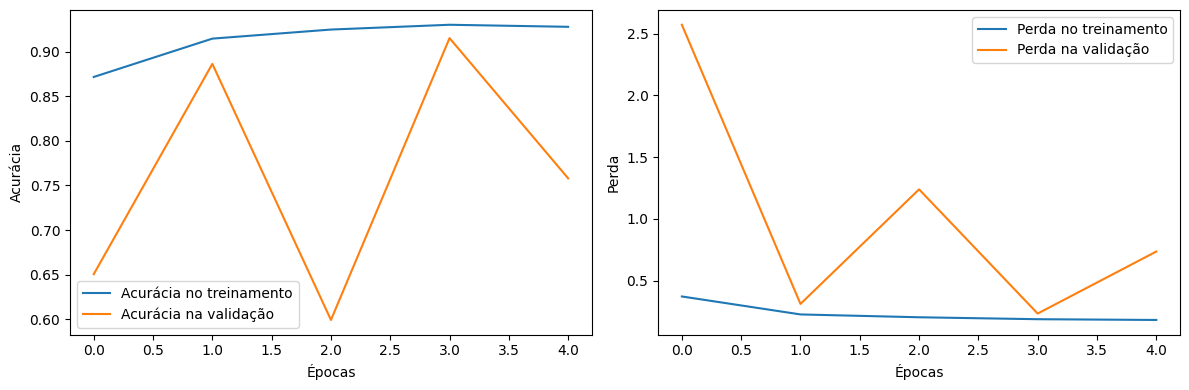

In [21]:


# Exibição da matriz de confusão e relatório de classificação
test_labels = test_generator.classes
predictions = model.predict(test_generator, steps=len(test_generator))
predicted_labels = (predictions > 0.5).astype(int)

conf_matrix = confusion_matrix(test_labels, predicted_labels)
print("Matriz de Confusão:")
print(conf_matrix)

class_report = classification_report(test_labels, predicted_labels, target_names=['Normal', 'Pneumonia'])
print("Relatório de Classificação:")
print(class_report)

# Plotagem da curva de aprendizado
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Acurácia no treinamento')
plt.plot(history.history['val_accuracy'], label='Acurácia na validação')
plt.xlabel('Épocas')
plt.ylabel('Acurácia')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Perda no treinamento')
plt.plot(history.history['val_loss'], label='Perda na validação')
plt.xlabel('Épocas')
plt.ylabel('Perda')
plt.legend()

plt.tight_layout()
plt.show()

In [15]:
# Monitoramento de desempenho
history_dict = history.history

best_train_acc = max(history_dict['accuracy'])
best_train_acc_epoch = history_dict['accuracy'].index(best_train_acc) + 1
best_train_loss = min(history_dict['loss'])
best_train_loss_epoch = history_dict['loss'].index(best_train_loss) + 1

best_val_acc = max(history_dict['val_accuracy'])
best_val_acc_epoch = history_dict['val_accuracy'].index(best_val_acc) + 1
best_val_loss = min(history_dict['val_loss'])
best_val_loss_epoch = history_dict['val_loss'].index(best_val_loss) + 1
print(f" - Melhor Acurácia de Treinamento: {best_train_acc} na Época: {best_train_acc_epoch}")
print(f" - Menor Perda de Treinamento: {best_train_loss} na Época: {best_train_loss_epoch}")
print(f" - Melhor Acurácia de Validação: {best_val_acc} na Época: {best_val_acc_epoch}")
print(f" - Menor Perda de Validação: {best_val_loss} na Época: {best_val_loss_epoch}")

 - Melhor Acurácia de Treinamento: 0.9445935487747192 na Época: 8
 - Menor Perda de Treinamento: 0.14380237460136414 na Época: 10
 - Melhor Acurácia de Validação: 0.9102563858032227 na Época: 1
 - Menor Perda de Validação: 0.23867565393447876 na Época: 4


## INSIGHTS DO MODELO 2
-Desempenho Geral:

- Acurácia Geral: O modelo possui uma acurácia de 59%, indicando que o modelo acerta ligeiramente mais da metade das previsões.
Desempenho por Classe:

Classe Normal:

- Precisão: 0.36
- Recall: 0.13
- F1-Score: 0.19

**Análise:**

Das 234 imagens normais, o modelo acertou 31 e errou 203.

A precisão de 0.36 indica que 36% das previsões de "Normal" são corretas.

O recall de 0.13 mostra que o modelo identifica corretamente apenas 13% das imagens que são realmente normais.

O modelo tem dificuldade em identificar corretamente as imagens normais, resultando em uma precisão e recall bastante baixos para esta classe.

Classe Pneumonia:

- Precisão: 0.62
- Recall: 0.86
- F1-Score: 0.72

**Análise:**

Dos 390 casos de pneumonia, o modelo acertou 336 e errou 54.

A precisão de 0.62 indica que 62% das previsões de "Pneumonia" são corretas.

O recall de 0.86 mostra que o modelo identifica corretamente 86% das imagens que são realmente pneumonia.

O modelo é significativamente mais eficaz em identificar corretamente as imagens de pneumonia em comparação à classe normal.

Conclusões e Recomendações:

Classe Normal: O modelo apresenta grandes dificuldades em identificar imagens normais, o que é evidente pelos valores baixos de precisão e recall. A grande quantidade de falsos positivos (203) e falsos negativos (54) para esta classe indica que há uma necessidade urgente de aprimoramento.

**Classe Pneumonia:** O modelo tem um desempenho relativamente bom na identificação de pneumonia, com uma precisão e recall muito melhores em comparação à classe normal. No entanto, ainda existem falsos negativos (54), onde o modelo falha em identificar pneumonia corretamente.

##Melhorias Sugeridas

- Balanceamento de Dados: A classe normal tem um desempenho muito ruim. Técnicas de balanceamento, como oversampling da classe normal ou undersampling da classe pneumonia, podem ajudar a melhorar o desempenho.

- Augmentação de Dados: Aplicar técnicas de augmentação de dados para aumentar a diversidade das imagens normais no conjunto de treinamento pode ajudar o modelo a generalizar melhor.

- Ajuste de Hiperparâmetros: Experimentar com diferentes hiperparâmetros, como taxa de aprendizado, tamanho do lote e número de épocas, para otimizar o desempenho do modelo.

- Modelos Alternativos: Considerar o uso de diferentes modelos de machine learning ou deep learning e comparar seus desempenhos.

- Feature Engineering: Explorar novas features que possam ajudar a diferenciar melhor as classes.

- Redução de Overfitting: Aplicar técnicas como regularização, dropout e validação cruzada para reduzir o overfitting e melhorar a capacidade de generalização do modelo.

Implementando essas recomendações, espera-se melhorar a precisão e recall para ambas as classes, resultando em um modelo mais equilibrado e confiável. Como o objetivo é detectar casos de pneumonia, pode-se considerar este modelo como um ponto de partida a ser melhorado.






